# Data Project - Stock Market Analysis
# TESSA NEJLA AYVAZOGLU

## Objective
This notebook explores stock market data, focusing on technology giants like Apple, Amazon, Google, and Microsoft. It demonstrates the use of yfinance to retrieve stock information and visualization techniques with Seaborn and Matplotlib. The analysis includes assessing stock risk using historical performance data and predicting future prices using a Linear Regression model.

![Stock Market Reactions to Election](image/unleashing-the-bulls-how-the-stock-market-achieved-unprecedented-record-levels2.jpg)

# Task Breakdown
- Identify reliable market data APIs
- Develop scripts/tools for data ingestion
- Clean and preprocess collected data
- Standardize data formats
- Explore data visualization techniques
- Perform exploratory data analysis (EDA)
- Extract relevant features from raw financial data
- Implement data transformation techniques
- Split the preprocessed data into training, validation, and test sets
- Document data collection and preprocessing procedures

## 1. Identify reliable market data APIs

##### We'll use the yfinance library, which provides a Pythonic interface to Yahoo Finance, a reliable source for historical market data.

In [1]:

# Install necessary libraries
!pip install -q yfinance
!pip install pandas-datareader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

yf.pdr_override()

# Set plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# # Download stock data for META, TSLA, NVDA, and NFLX
# META = yf.download('META', start='2023-01-01', end='2025-01-01')
# AAPL = yf.download('AAPL', start='2023-01-01', end='2025-01-01')
# NVDA = yf.download('NVDA', start='2023-01-01', end='2025-01-01')
# NFLX = yf.download('NFLX', start='2023-01-01', end='2025-01-01')

  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


# 2. Develop scripts/tools for data ingestion
##### We'll create a script to download stock data for Apple, Amazon, Google, and Microsoft.

In [2]:
import pandas as pd
from datetime import datetime

#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# Download stock data
META = yf.download('META', start=start, end=end)
AAPL = yf.download('AAPL', start=start, end=end)
NVDA = yf.download('NVDA', start=start, end=end)
NFLX = yf.download('NFLX', start=start, end=end)

company_list = [META, AAPL, NVDA, NFLX]
company_name = ["META", "APPLE", "NVIDIA", "NETFLIX"]
# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start=start, end=end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# 3. Clean and preprocess collected data
##### Add company names and concatenate data into a single DataFrame.

In [3]:
# Fill missing values using forward fill
for company in company_list:
    company.ffill(inplace=True)  # Forward fill to handle missing data

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Add company name column to each dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate individual stock data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Shuffle the data and get a random sample of the last 10 rows
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data
print(df.tail(10))  # Display the last 10 rows of the shuffled dataframe

            Open        High         Low       Close   Adj Close    Volume   
998   271.670013  274.250000  262.799988  263.600006  263.320618  26163600  \
999   377.239990  388.640015  375.049988  385.100006  385.016388  41777200   
1000  339.209991  342.920013  338.579987  341.489990  341.128052  10702700   
1001  270.299988  275.570007  269.559998  271.390015  271.102356  20742900   
1002  491.239990  494.019989  489.250000  491.790009  491.790009   2561300   
1003  323.529999  325.049988  312.369995  314.690002  314.356476  21341000   
1004  172.259995  173.630005  170.820007  172.399994  171.720840  49594600   
1005  430.769989  436.970001  426.910004  436.630005  436.571136  40146300   
1006  452.850006  459.350006  448.989990  457.510010  457.448334  40073300   
1007  412.000000  419.250000  407.559998  416.029999  416.029999   5390900   

     company_name  
998          META  
999        NVIDIA  
1000         META  
1001         META  
1002      NETFLIX  
1003         META  
1

# 4. Standardize data formats
##### Ensure all columns have consistent formats and handle missing values.

In [4]:
df = df.reset_index()
df = df.fillna(method='ffill')

# 5. Explore data visualization techniques
##### Visualize the closing price and volume of sales.

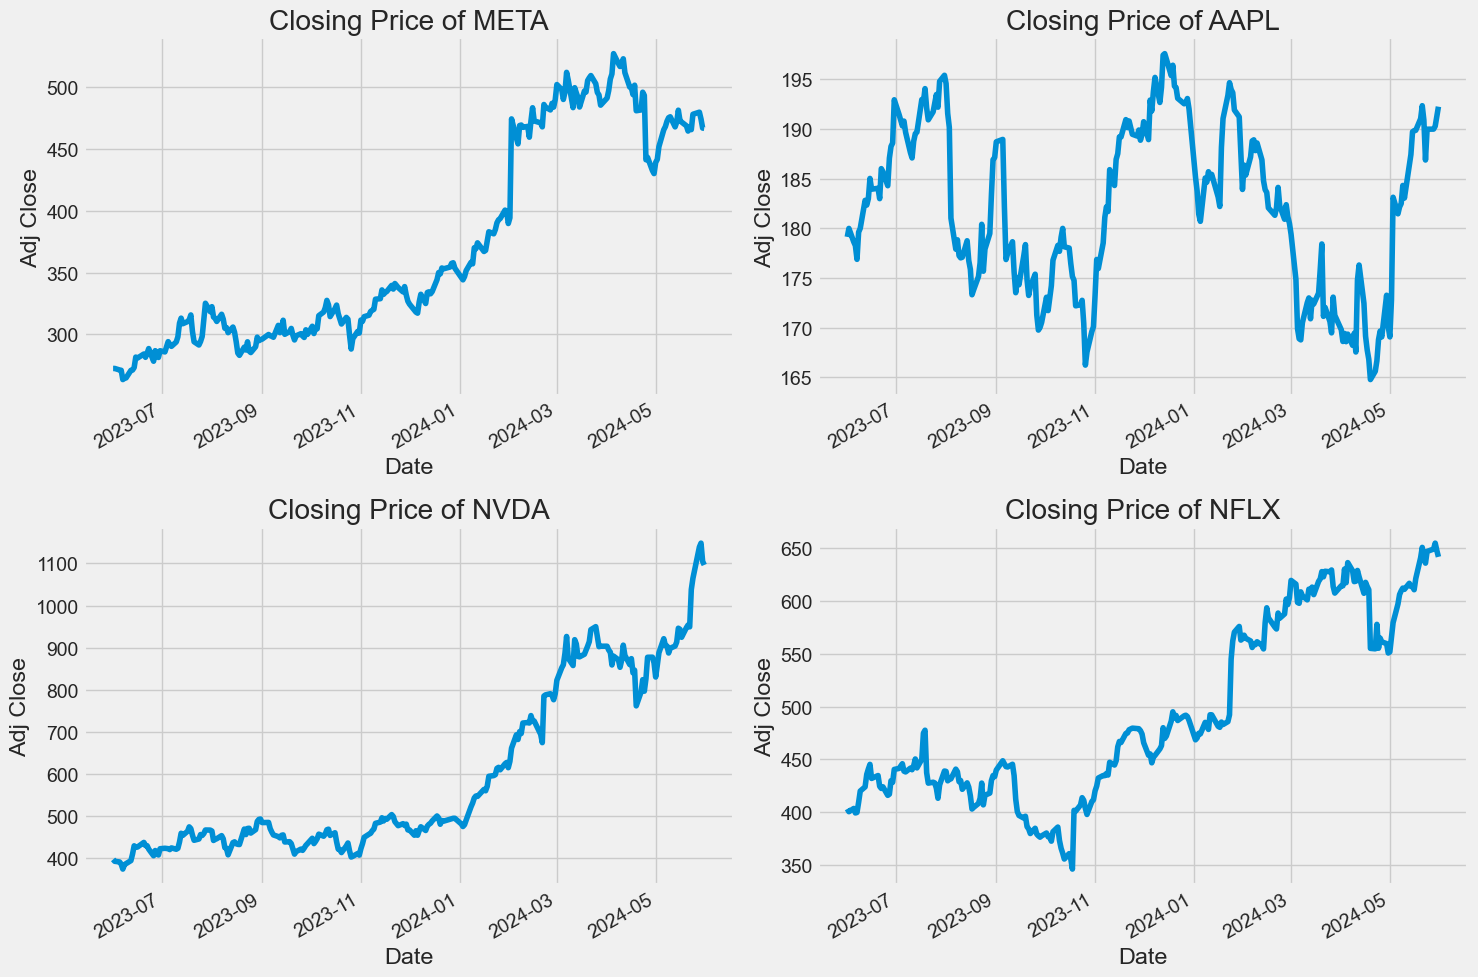

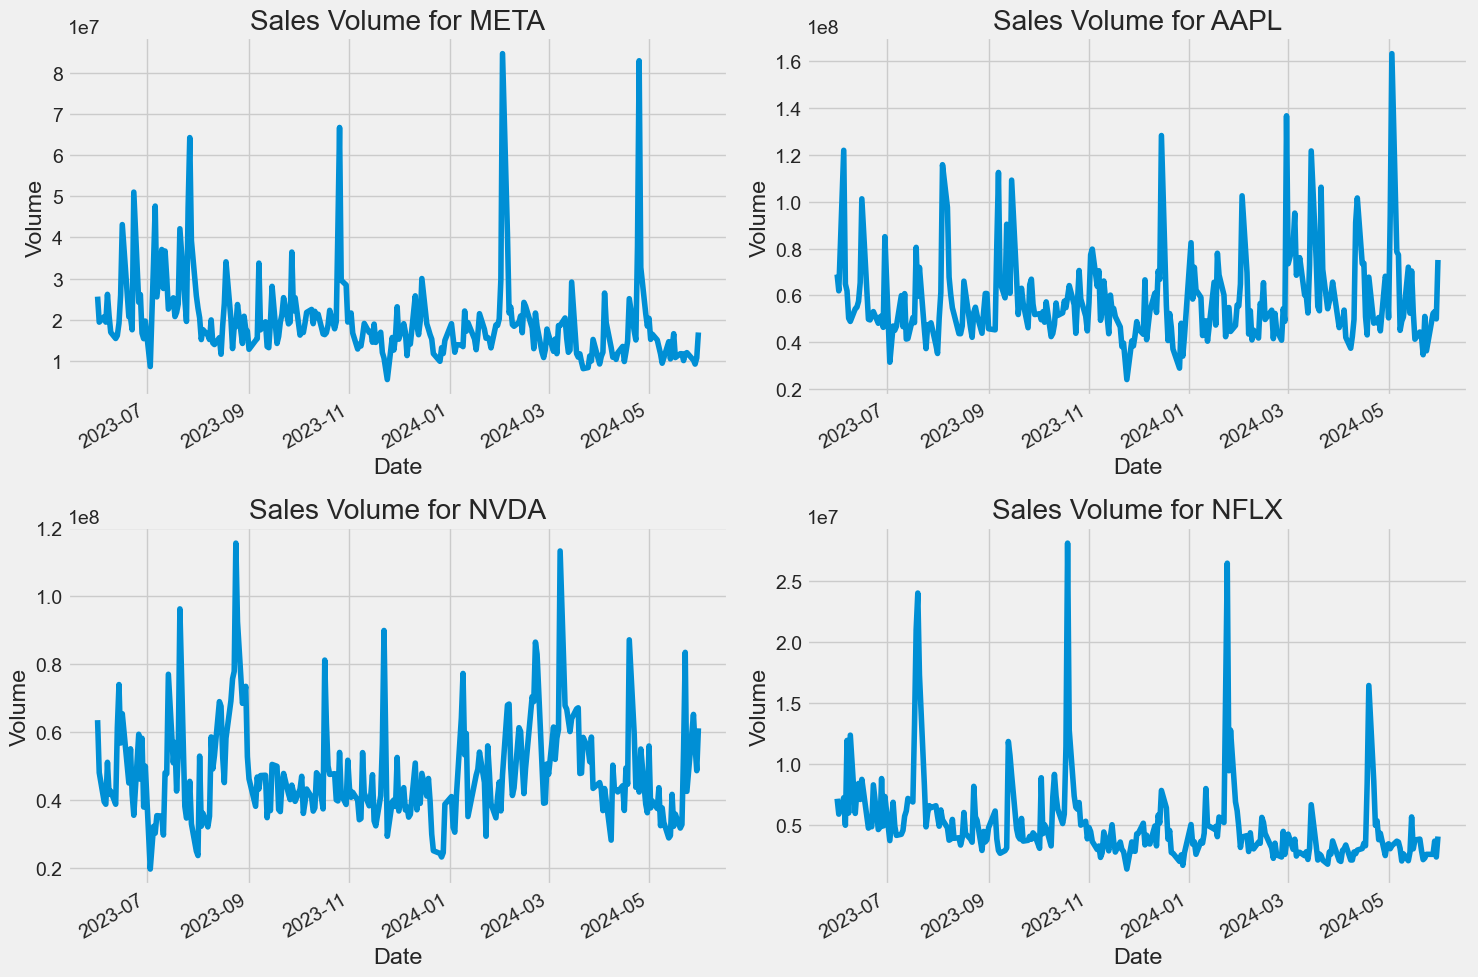

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

# 6. Perform exploratory data analysis (EDA)
##### Calculate and plot moving averages.

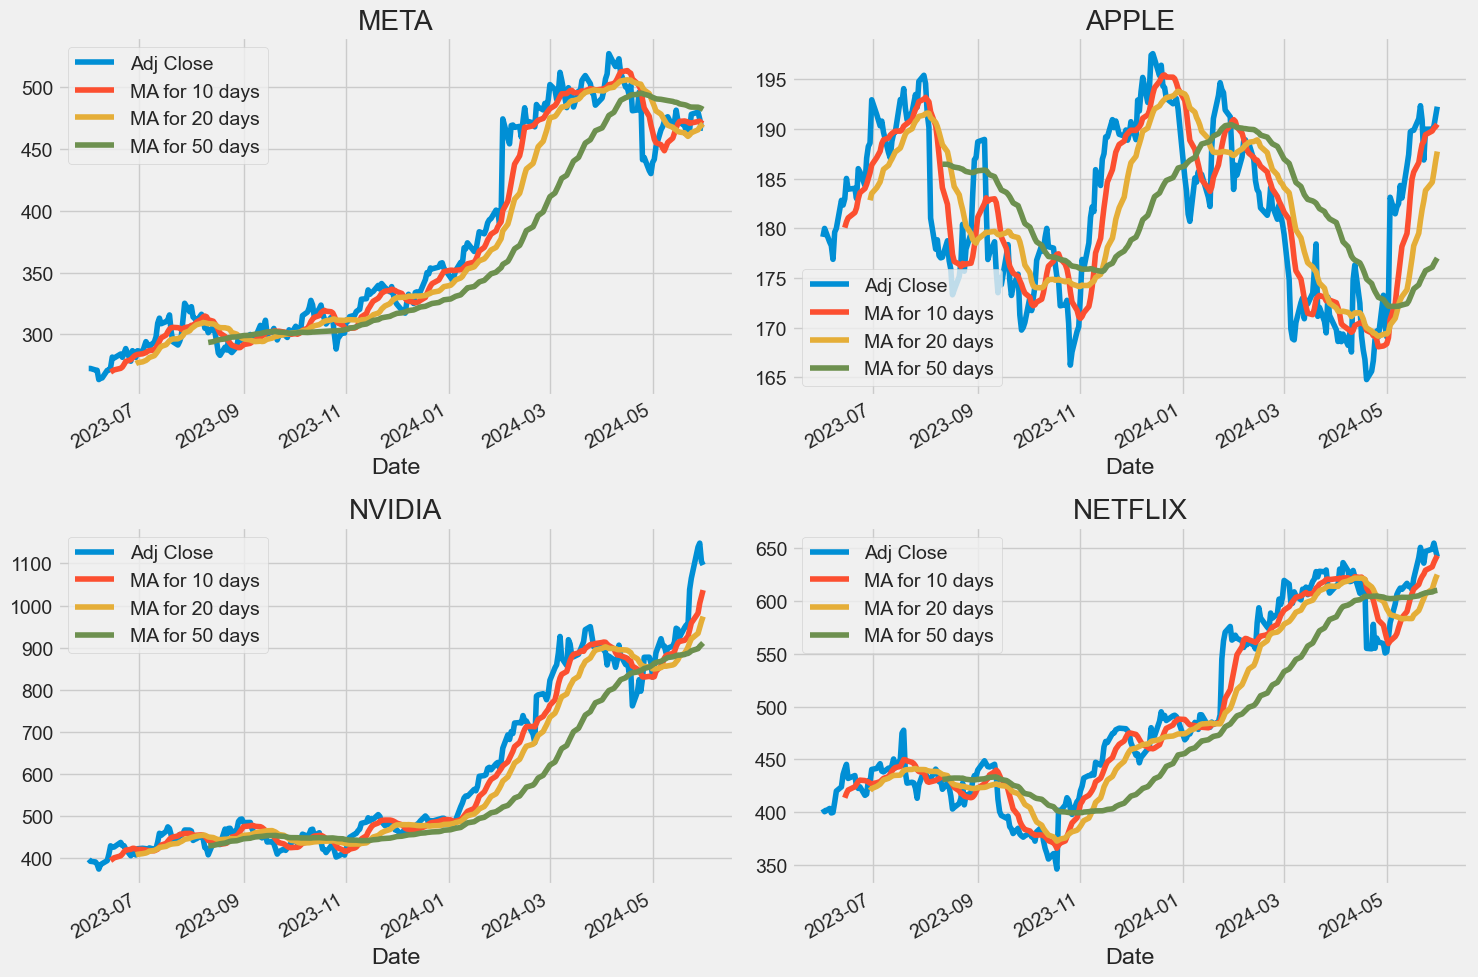

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('META')
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('APPLE')
NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NVIDIA')
NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NETFLIX')
fig.tight_layout()

# 7. Extract relevant features from raw financial data
##### Calculate daily returns and visualize them.

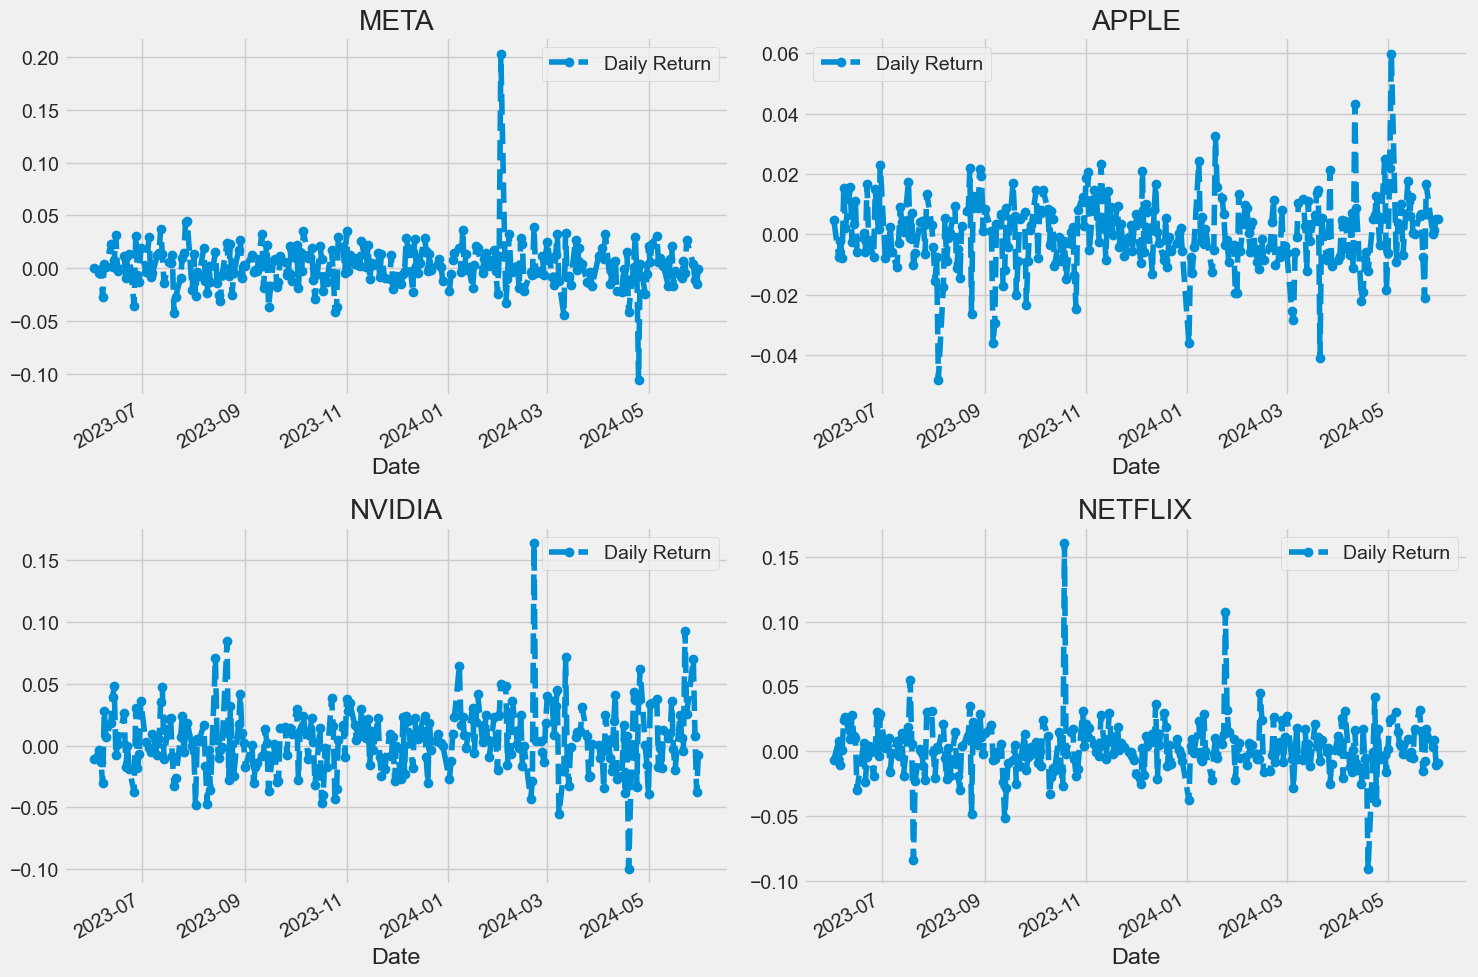

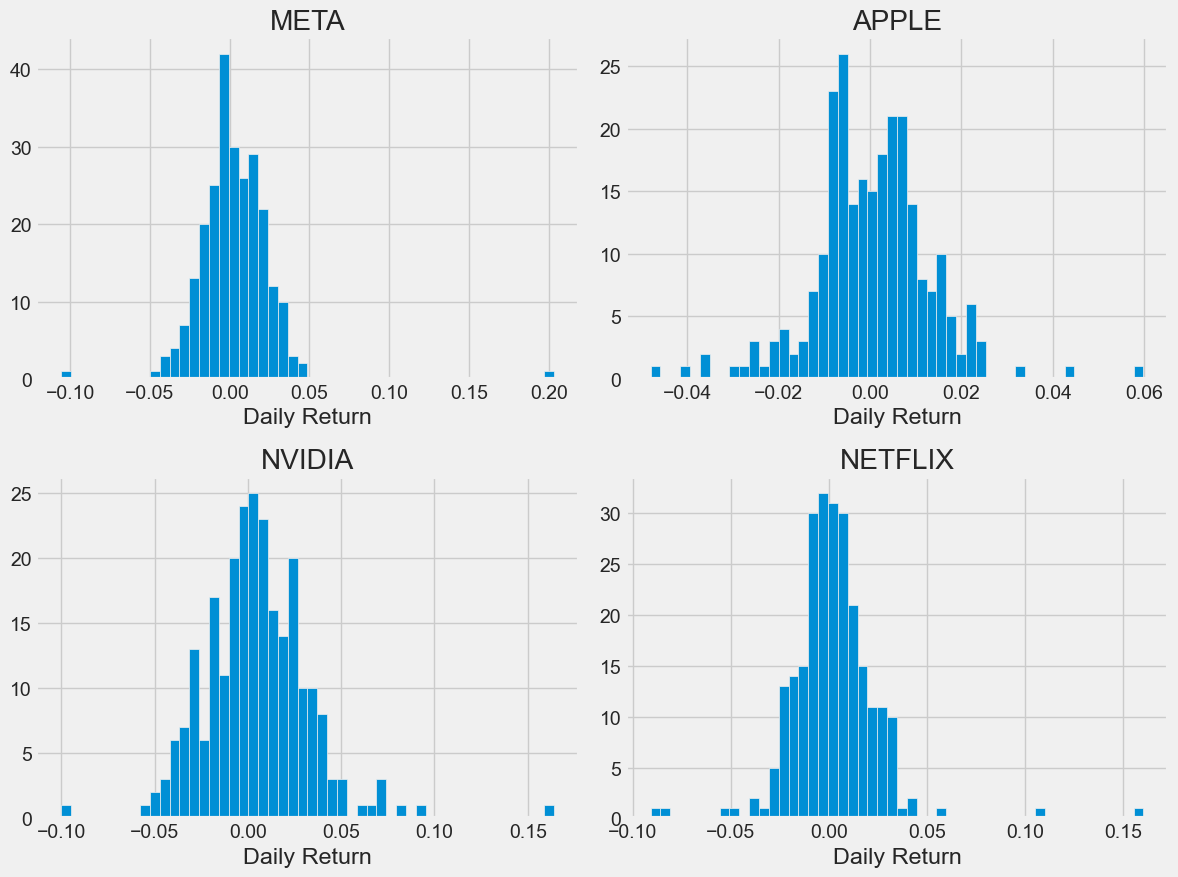

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
META['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('META')
AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('APPLE')
NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVIDIA')
NFLX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NETFLIX')
fig.tight_layout()

plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


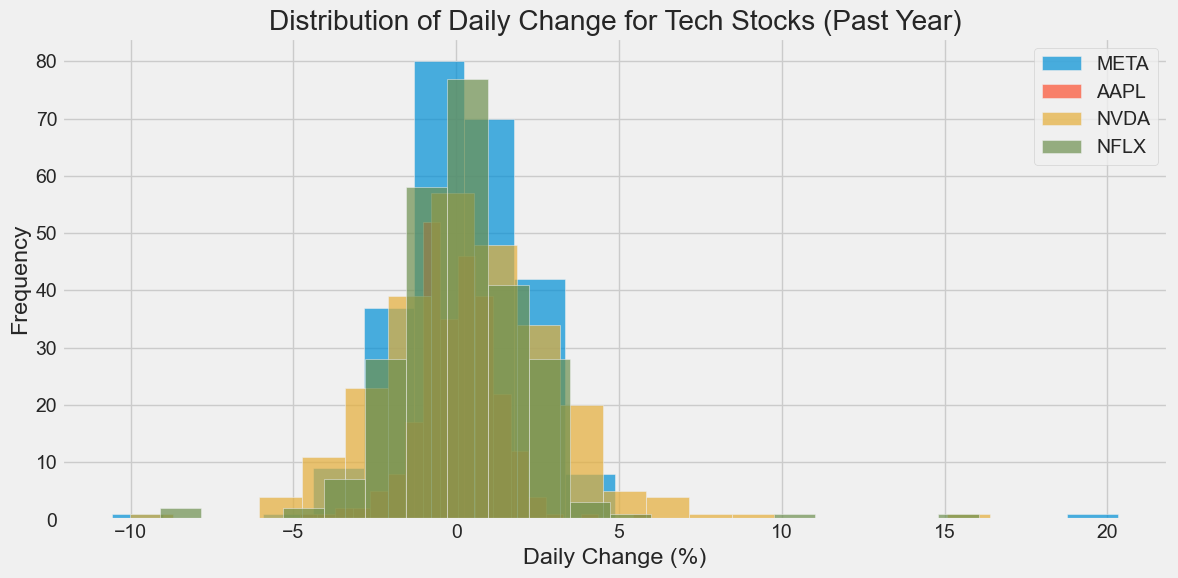

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define company tickers
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Download stock data for the past year
end = pd.to_datetime('2024-05-27')
start = end - pd.DateOffset(years=1)
company_list = []
for stock in tech_list:
    company_list.append(yf.download(stock, start=start, end=end))

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Calculate daily percentage change
for company in company_list:
    company['Daily Change'] = company['Adj Close'].pct_change() * 100

# Create histogram (one plot for all companies)
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_list):
    # Overlay histograms on the same plot with different transparency levels
    plt.hist(company['Daily Change'], bins=20, alpha=0.7, label=tech_list[i])  
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Change for Tech Stocks (Past Year)')
plt.legend()  # Add legend to identify each company's distribution
plt.tight_layout()

# ... (Rest of the code for identifying best/worst performers and displaying additional info)

plt.show()

# 8. Implement data transformation techniques
##### Calculate correlations and visualize them using heatmaps and pair plots.

[*********************100%%**********************]  4 of 4 completed


Text(0.5, 1.0, 'Correlation of stock closing price')

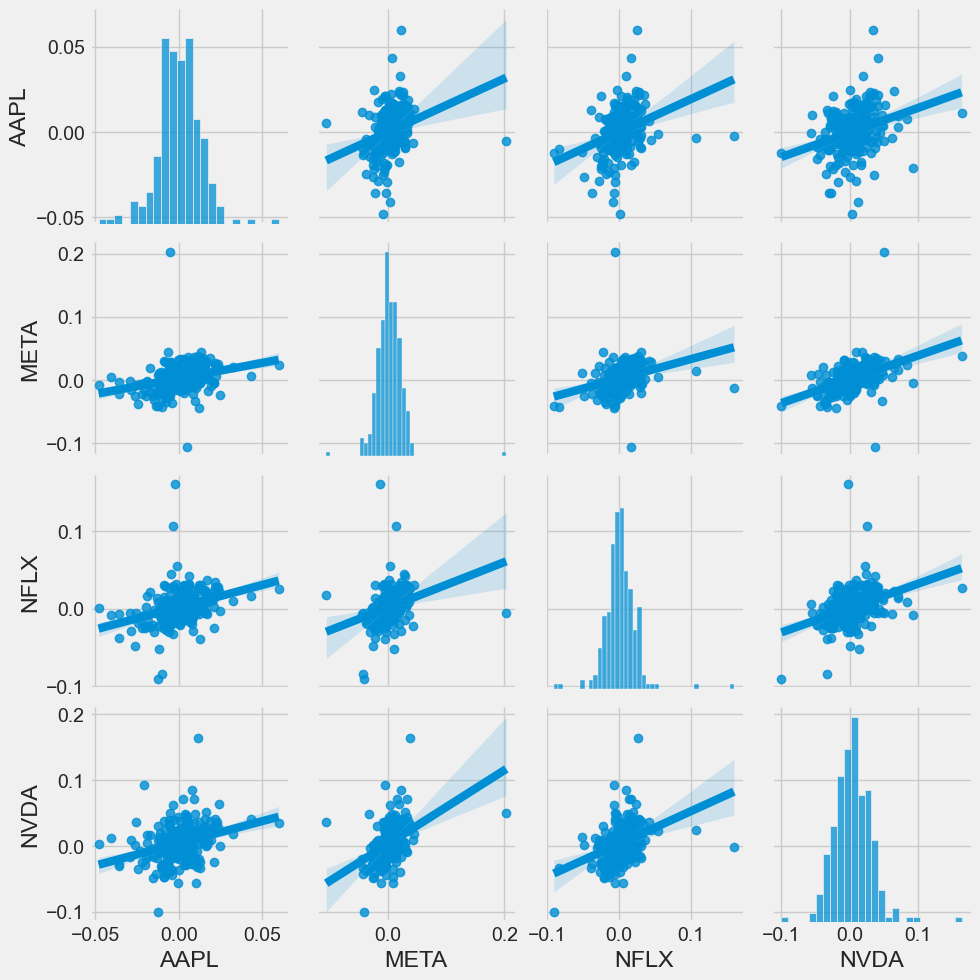

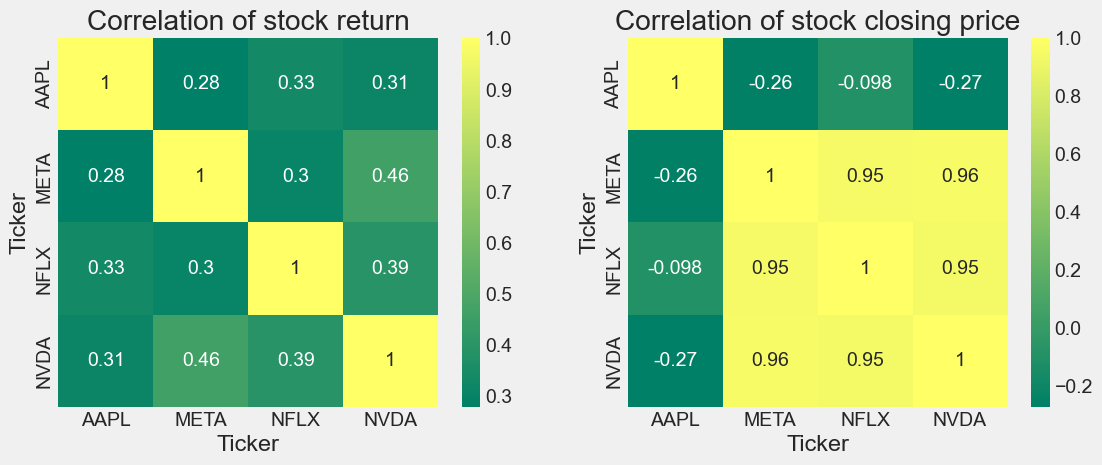

In [9]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()

sns.pairplot(tech_rets, kind='reg')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 9. Split the preprocessed data into training, validation, and test sets
##### Split the data for model training and validation.

In [10]:
from sklearn.model_selection import train_test_split

# Drop missing values from both tech_rets and closing_df
tech_rets_cleaned = tech_rets.dropna()
closing_df_cleaned = closing_df.dropna()

# Align the number of rows in tech_rets_cleaned and closing_df_cleaned
min_rows = min(tech_rets_cleaned.shape[0], closing_df_cleaned.shape[0])
tech_rets_cleaned = tech_rets_cleaned[:min_rows]
closing_df_cleaned = closing_df_cleaned[:min_rows]

# Create X and y after handling missing values
X = tech_rets_cleaned.values
y = closing_df_cleaned.values

# Print the shapes of X and y for verification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X: (249, 4)
Shape of y: (249, 4)


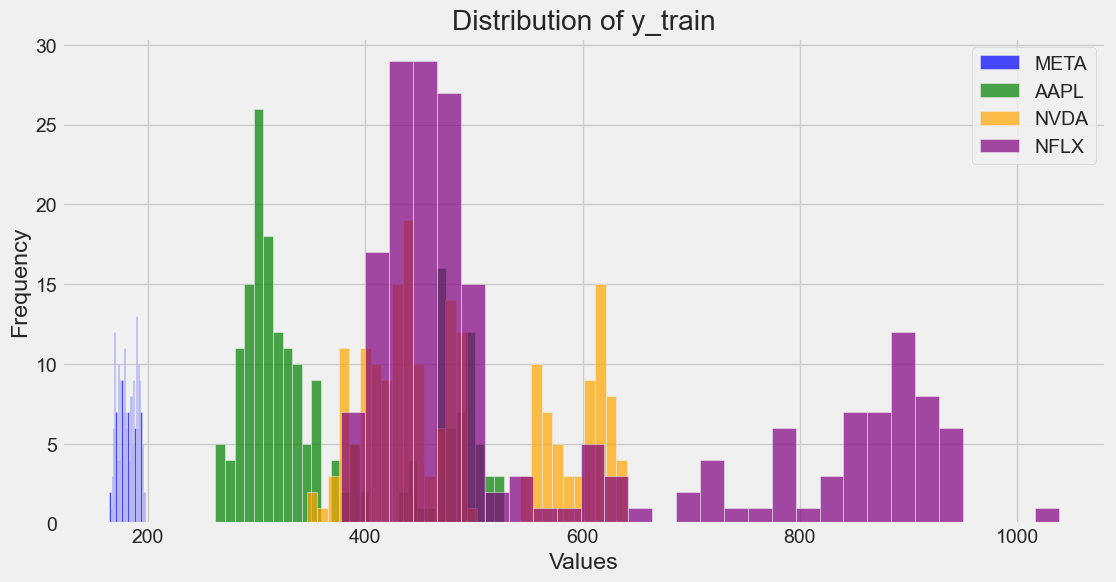

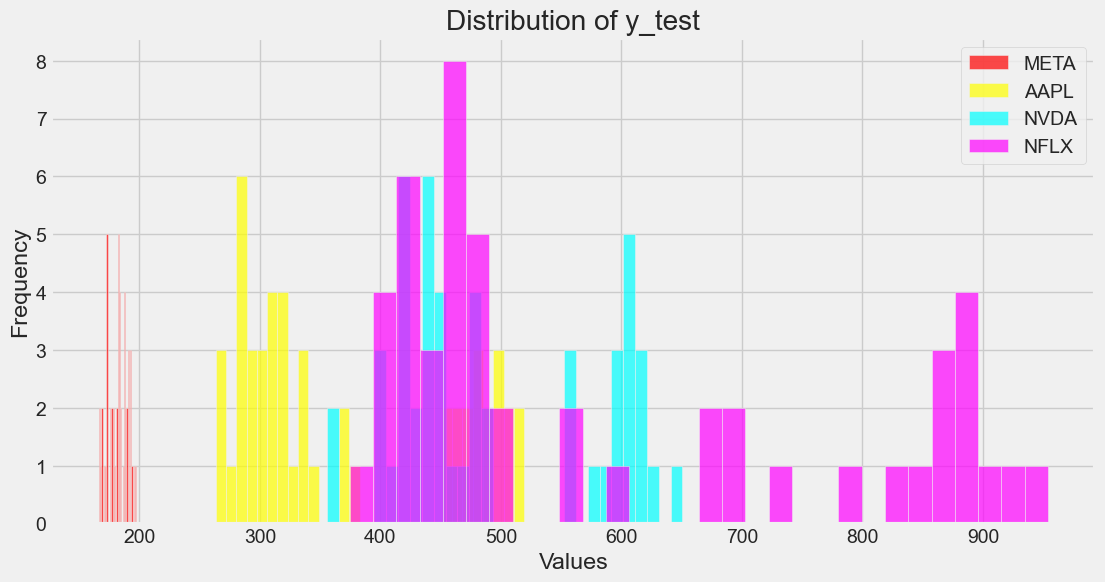

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for the histograms
train_colors = ['blue', 'green', 'orange', 'purple']  # Adjust as needed
test_colors = ['red', 'yellow', 'cyan', 'magenta']    # Adjust as needed

# Plot the distribution of y_train
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_train.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=train_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the distribution of y_test
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_test.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=test_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 10. Document data collection and preprocessing procedures
##### Keep thorough documentation of each step for reproducibility.

## Documentation
### Data Collection
- Data sourced from Yahoo Finance using yfinance library.
- Stock symbols: AAPL, GOOG, MSFT, AMZN.
- Time period: Last one year.

### Data Preprocessing
- Filled missing values using forward fill.
- Added company name column.
- Concatenated individual stock data into a single DataFrame.

### Data Standardization
- Ensured consistent date format.
- Handled missing values.

### Data Visualization
- Plotted closing prices and volume of sales.
- Calculated and plotted moving averages (10, 20, 50 days).
- Visualized daily returns using histograms and line plots.

### Feature Extraction
- Calculated daily returns.
- Analyzed correlations between stock returns using heatmaps and pair plots.

### Data Splitting
- Split data into training and test sets for model validation.

## Conclusion

In this notebook, we delved into the world of stock market data analysis. Here's a summary of what we explored:

- We learned how to retrieve stock market data from Yahoo Finance using the yfinance library.
- Using Pandas, Matplotlib, and Seaborn, we visualized time-series data to gain insights into the stock market trends.
- We measured the correlation between different stocks to understand how they move in relation to each other.
- We assessed the risk associated with investing in a particular stock by analyzing its daily returns.
- Lastly, we split the data into training and validation sets for further analysis and model training.

If you have any questions or need further clarification on any topic covered in this notebook, feel free to ask in the comments below. I'll be happy to assist you!

References:
- [Investopedia on Correlation](https://www.investopedia.com/terms/c/correlation.asp)
- file:///C:/Users/Admin/Desktop/C_AIML/semestert2/AI%20for%20Business/article1.pdf
- https://medium.com/@ethan.duong1120/stock-data-analysis-project-python-1bf2c51b615f
  

In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the data for LSTM input
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print("X_train:")
print(X_train[:10])  # Print the first 10 rows of X_train
print("\nX_test:")
print(X_test[:10])   # Print the first 10 rows of X_test
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

# Make predictions
predictions_lstm = model_lstm.predict(X_test_lstm)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model_nn.add(Dense(units=32, activation='relu'))
model_nn.add(Dense(units=1))

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_nn.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions_nn = model_nn.predict(X_test)

Epoch 1/100
7/7 [==============================] - 0s 0s/step - loss: 198712.9375
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 198651.5781
Epoch 3/100
7/7 [==============================] - 0s 0s/step - loss: 198570.1250
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 198463.4531
Epoch 5/100
7/7 [==============================] - 0s 0s/step - loss: 198323.9375
Epoch 6/100
7/7 [==============================] - 0s 419us/step - loss: 198147.4844
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 197922.9219
Epoch 8/100
7/7 [==============================] - 0s 735us/step - loss: 197641.3594
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 197287.9062
Epoch 10/100
7/7 [==============================] - 0s 0s/step - loss: 196853.9844
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 196324.6406
Epoch 12/100
7/7 [==============================] - 0s 344us/step - loss: 195692.3438

Unique values in y_train: [ 164.77650452  165.61535645  166.67391968  167.55273438  167.55731201
  167.77244568  168.59133911  168.61129761  168.7910614   169.07067871
  169.15057373  169.35029602  169.42019653  169.44017029  169.48013306
  169.61912537  169.65988159  169.7585907   169.79969788  169.88957214
  170.01757812  170.09725952  170.09928894  170.42597961  170.53553772
  170.61859131  170.89820862  171.13787842  171.24772644  171.28257751
  171.72084045  172.04664612  172.19895935  172.31848145  172.45608521
  172.75674438  172.79562378  172.97587585  172.99534607  173.06550598
  173.07524109  173.24479675  173.26498413  173.52371216  173.80262756
  174.10142517  174.22096252  174.32054138  174.76878357  174.79867554
  174.80290222  174.86282349  175.04768372  175.14727783  175.38633728
  175.60548401  175.8414917   175.87442017  175.95410156  176.31086731
  176.31365967  176.3633728   176.53179932  176.75094604  176.79078674
  176.87046814  177.02984619  177.08961487  177.248

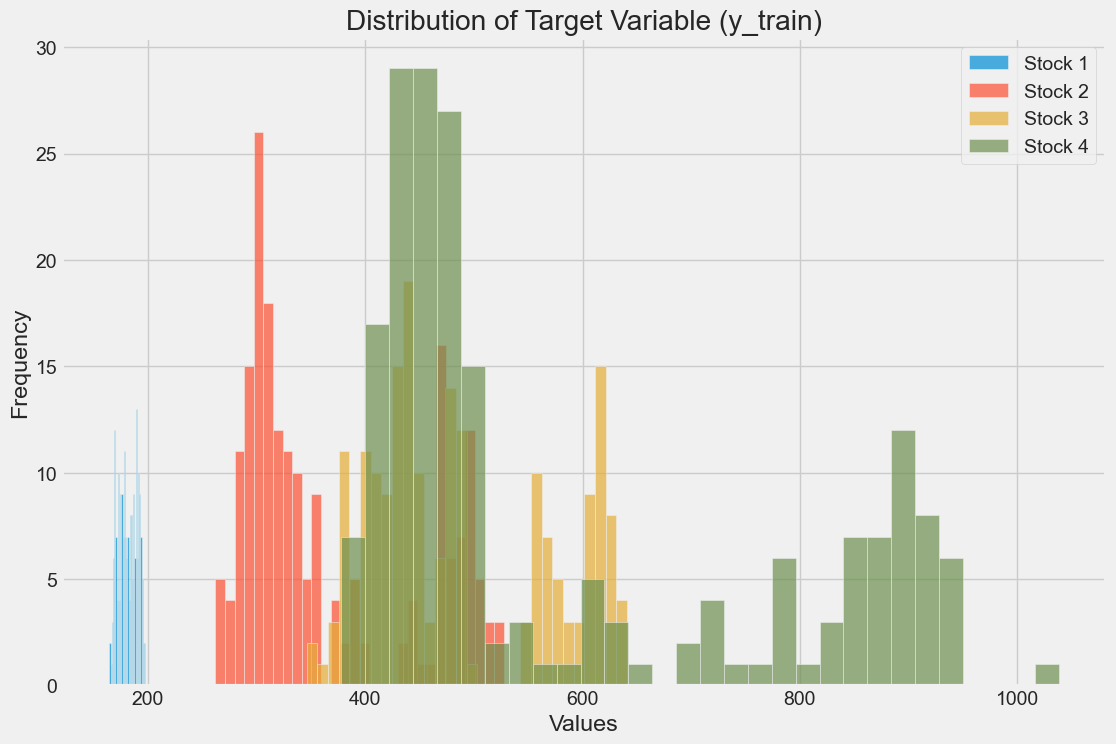

Mean Squared Error: 12711.526743683648


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(y_train.shape[1]):
    plt.hist(y_train[:, i], bins=30, alpha=0.7, label=f'Stock {i+1}')

plt.title('Distribution of Target Variable (y_train)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize predictions vs actual trend
# You can plot the predicted trend against the actual trend to visually compare
# Assuming you have a function to plot the trends similar to the one in your original code
# plot_trends(X_test, y_test, y_pred)

[*********************100%%**********************]  1 of 1 completed

Processing META...


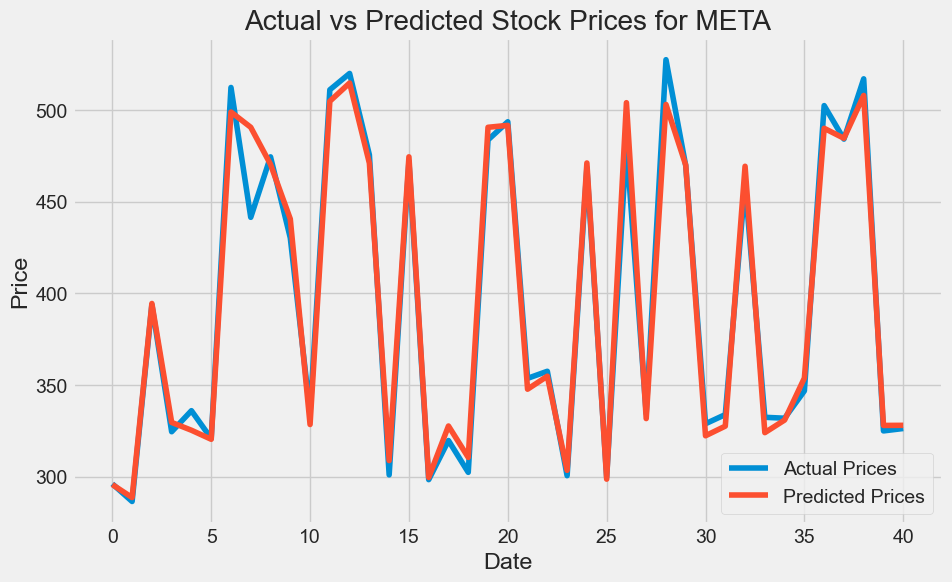

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


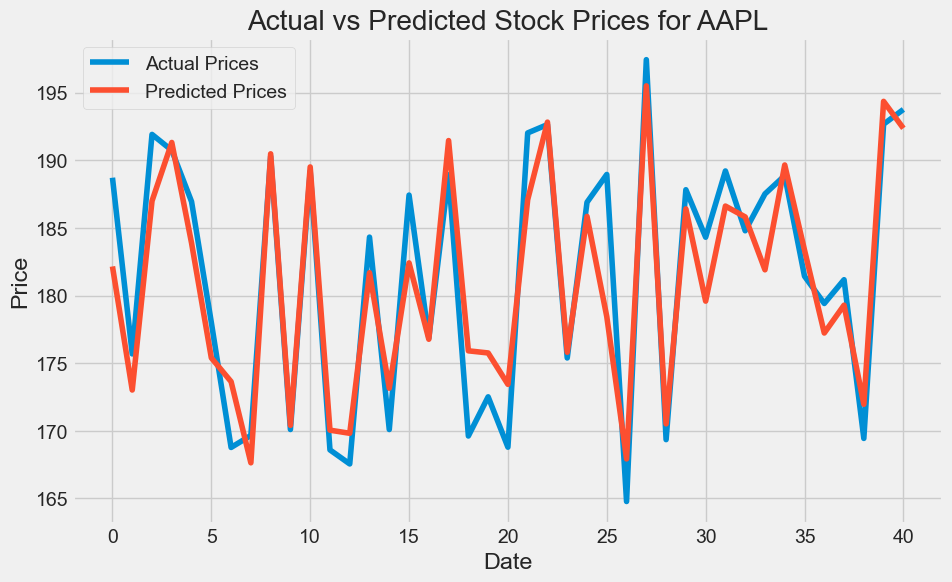

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


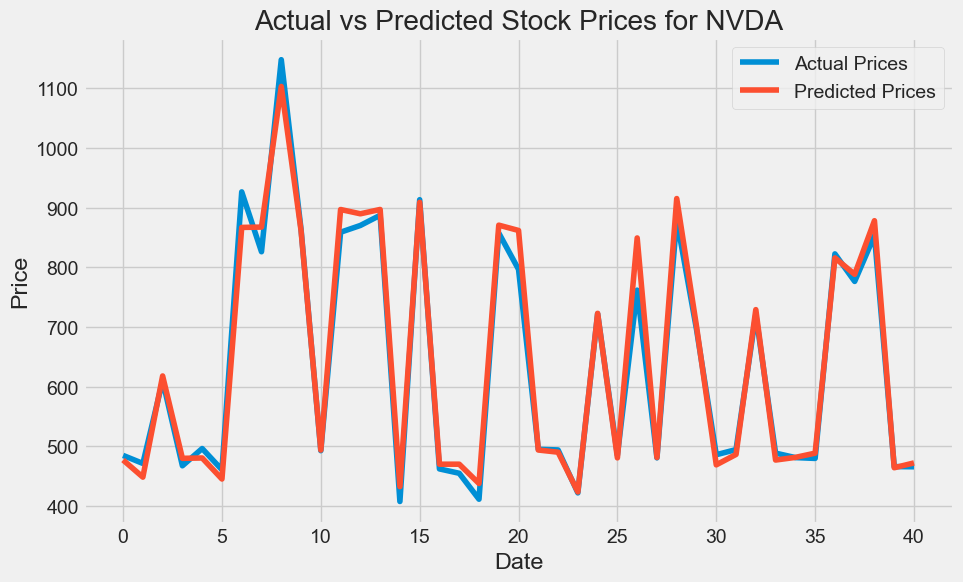

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


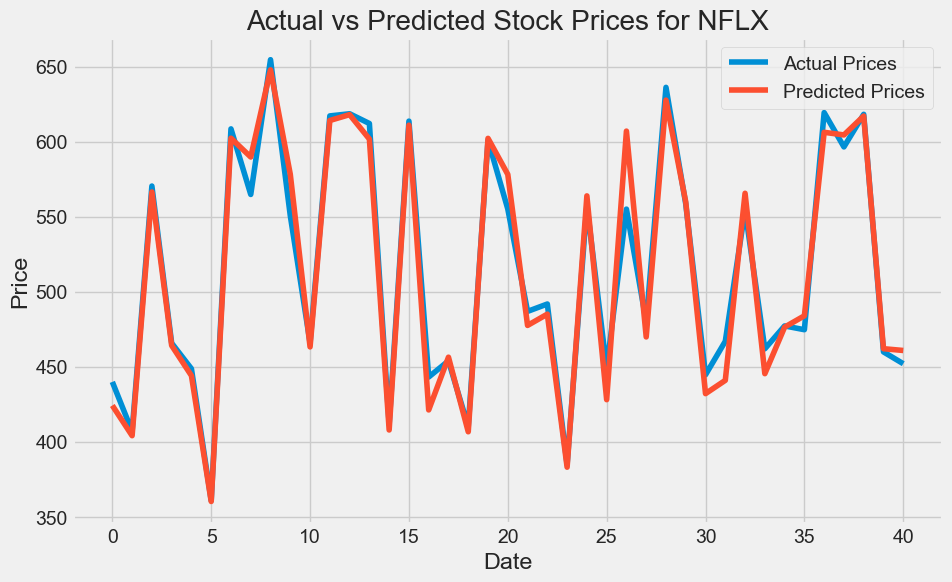

META:
Mean Squared Error: 120.90425980786517
Mean Absolute Error: 6.976403434116395

AAPL:
Mean Squared Error: 11.812314309833095
Mean Absolute Error: 2.6937501135105046

NVDA:
Mean Squared Error: 658.4043516457613
Mean Absolute Error: 17.116642471523324

NFLX:
Mean Squared Error: 196.46587527911143
Mean Absolute Error: 9.663600631341698



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Download stock data
yf.pdr_override()
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Function to prepare data for each stock
def prepare_data(ticker):
    stock = pdr.get_data_yahoo(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    rf = RandomForestRegressor()
    param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_rf = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_rf.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


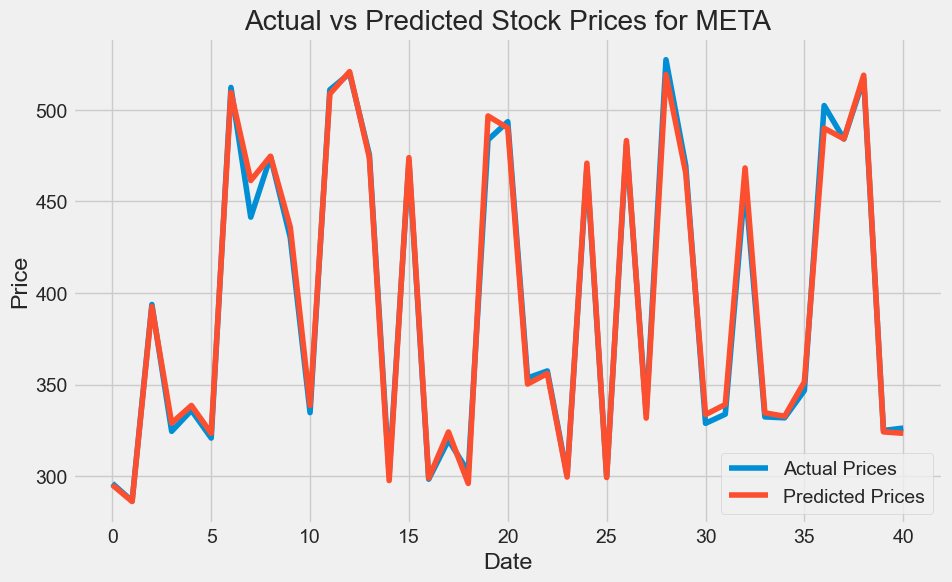

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


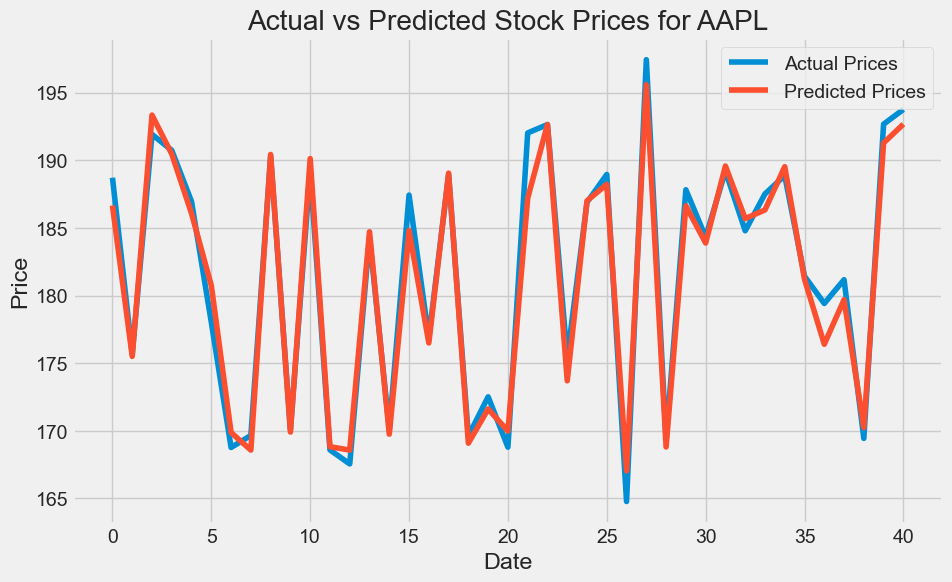

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


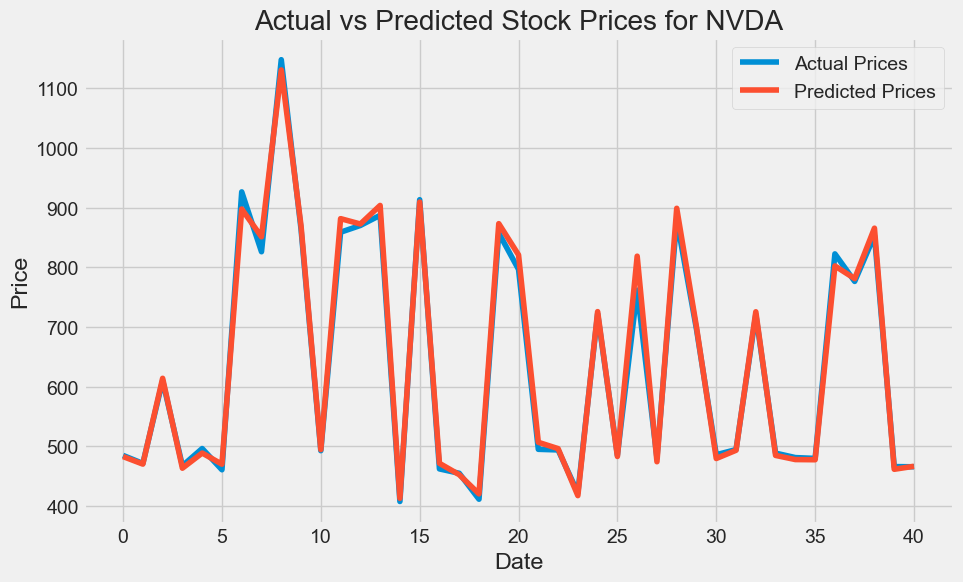

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


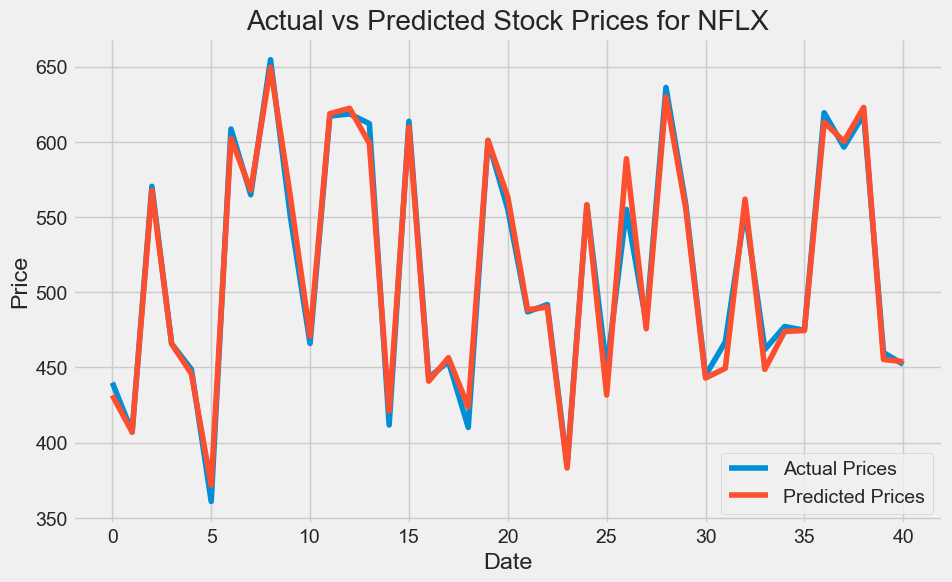

META:
Mean Squared Error: 29.013272520621328
Mean Absolute Error: 3.726685070599816

AAPL:
Mean Squared Error: 2.0439997239188927
Mean Absolute Error: 1.0598846605786592

NVDA:
Mean Squared Error: 203.70982546183967
Mean Absolute Error: 9.570515738284836

NFLX:
Mean Squared Error: 77.62173432314333
Mean Absolute Error: 6.076516550390683



In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


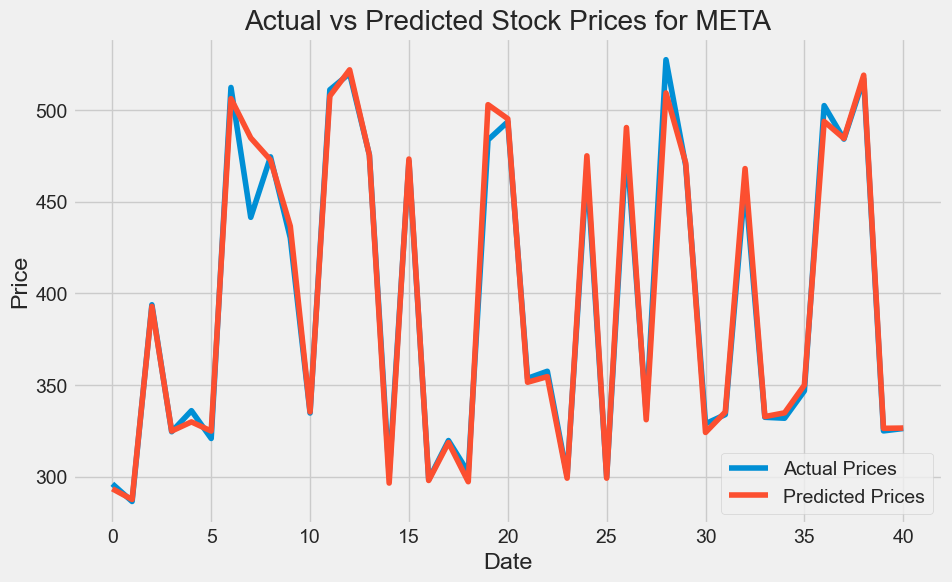

Processing AAPL...


[*********************100%%**********************]  1 of 1 completed


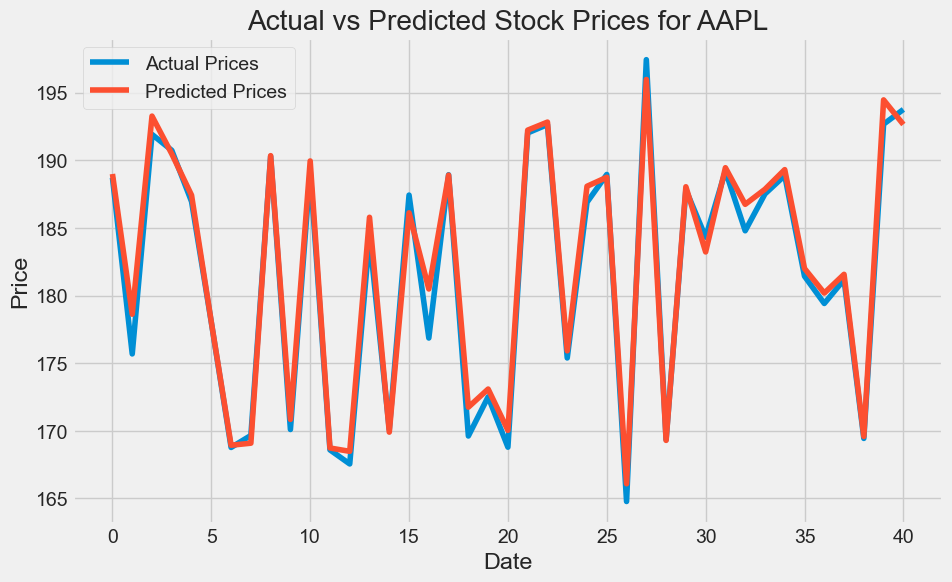

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


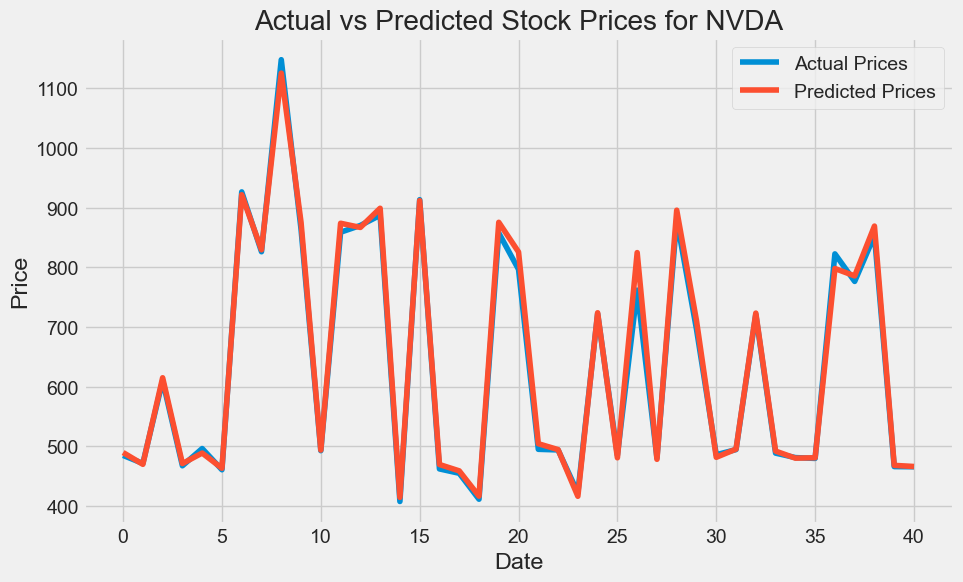

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


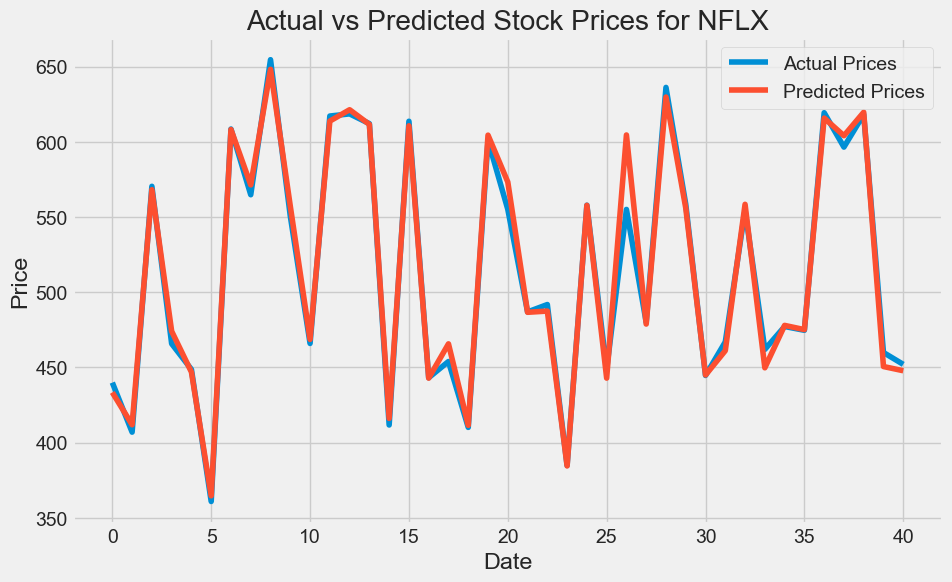

META:
Mean Squared Error: 76.43674072380207
Mean Absolute Error: 4.670031624959053

AAPL:
Mean Squared Error: 1.3000270080000167
Mean Absolute Error: 0.8162233908216887

NVDA:
Mean Squared Error: 196.0717772692133
Mean Absolute Error: 8.60221105899563

NFLX:
Mean Squared Error: 91.47280031585008
Mean Absolute Error: 5.347218156949888



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    
    # Adding Bollinger Bands
    stock['20_day_std'] = stock['Adj Close'].rolling(window=20).std()
    stock['Upper_Band'] = stock['20_day_MA'] + (stock['20_day_std'] * 2)
    stock['Lower_Band'] = stock['20_day_MA'] - (stock['20_day_std'] * 2)
    
    # Lag features
    stock['Lag_1'] = stock['Adj Close'].shift(1)
    stock['Lag_2'] = stock['Adj Close'].shift(2)
    
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 
                'Upper_Band', 'Lower_Band', 'Lag_1', 'Lag_2']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


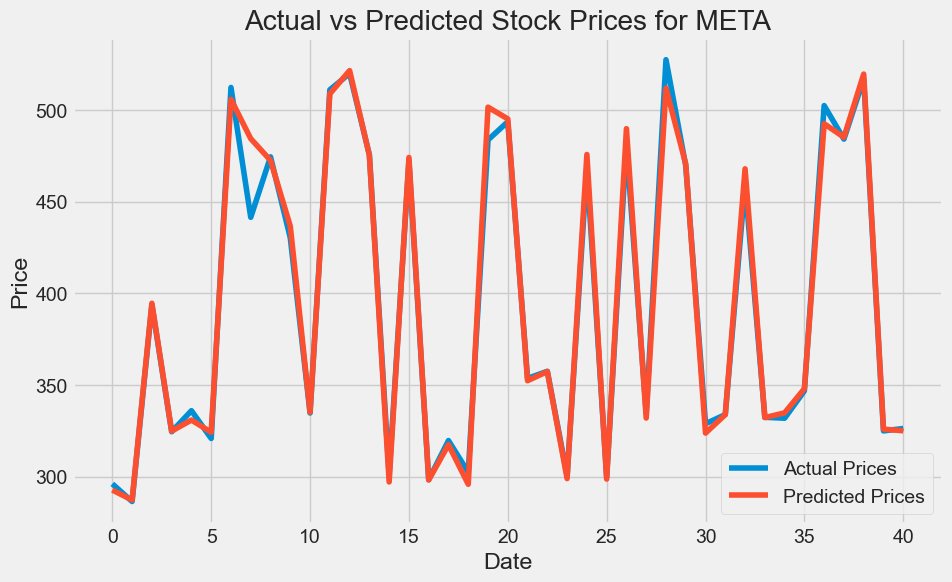

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


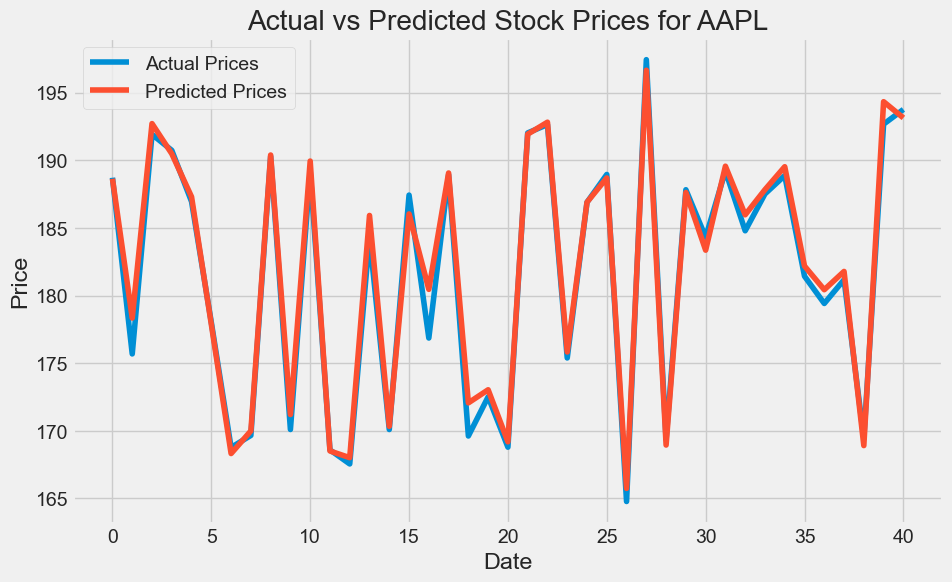

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


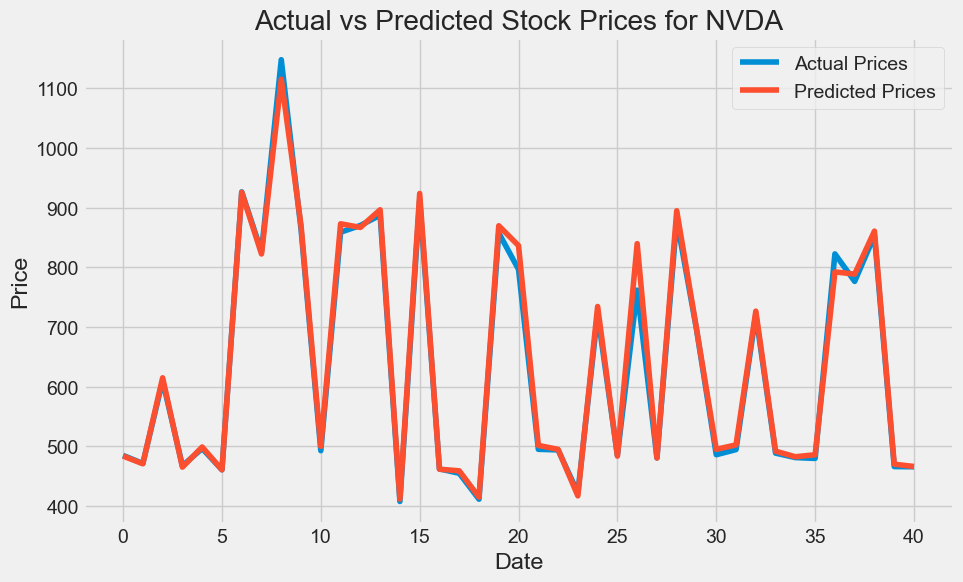

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


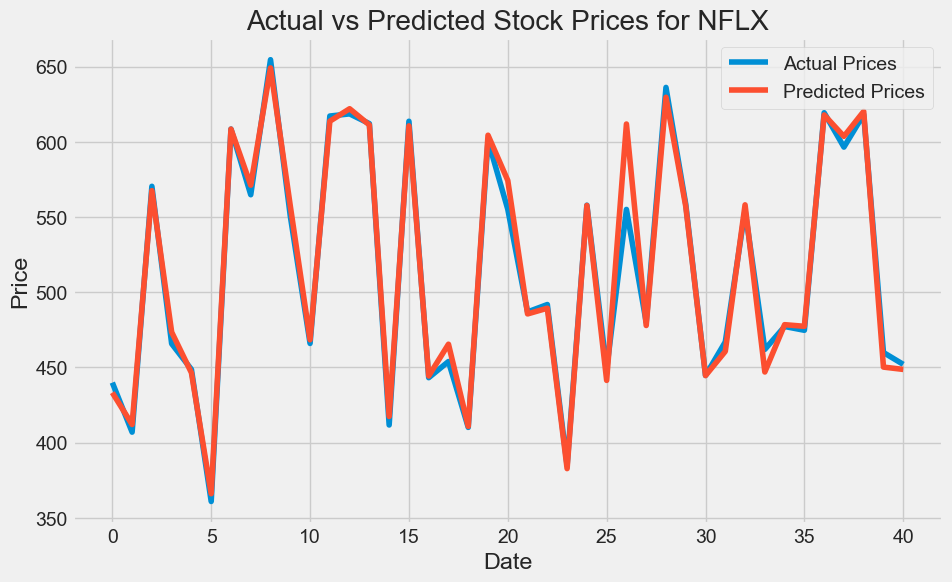

META:
Mean Squared Error: 72.25715131919927
Mean Absolute Error: 4.449294259040038

AAPL:
Mean Squared Error: 1.087594559372442
Mean Absolute Error: 0.7286874834633493

NVDA:
Mean Squared Error: 274.951002466877
Mean Absolute Error: 9.056490170455486

NFLX:
Mean Squared Error: 113.62666137096123
Mean Absolute Error: 5.7536296945965715



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Custom function to calculate On-Balance Volume (OBV)
def calculate_obv(data):
    obv = (np.sign(data['Adj Close'].diff()) * data['Volume']).fillna(0).cumsum()
    return obv

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    stock['OBV'] = calculate_obv(stock)
    
    # Adding Bollinger Bands
    stock['20_day_std'] = stock['Adj Close'].rolling(window=20).std()
    stock['Upper_Band'] = stock['20_day_MA'] + (stock['20_day_std'] * 2)
    stock['Lower_Band'] = stock['20_day_MA'] - (stock['20_day_std'] * 2)
    
    # Lag features
    stock['Lag_1'] = stock['Adj Close'].shift(1)
    stock['Lag_2'] = stock['Adj Close'].shift(2)
    
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 
                'Upper_Band', 'Lower_Band', 'Lag_1', 'Lag_2', 'OBV']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


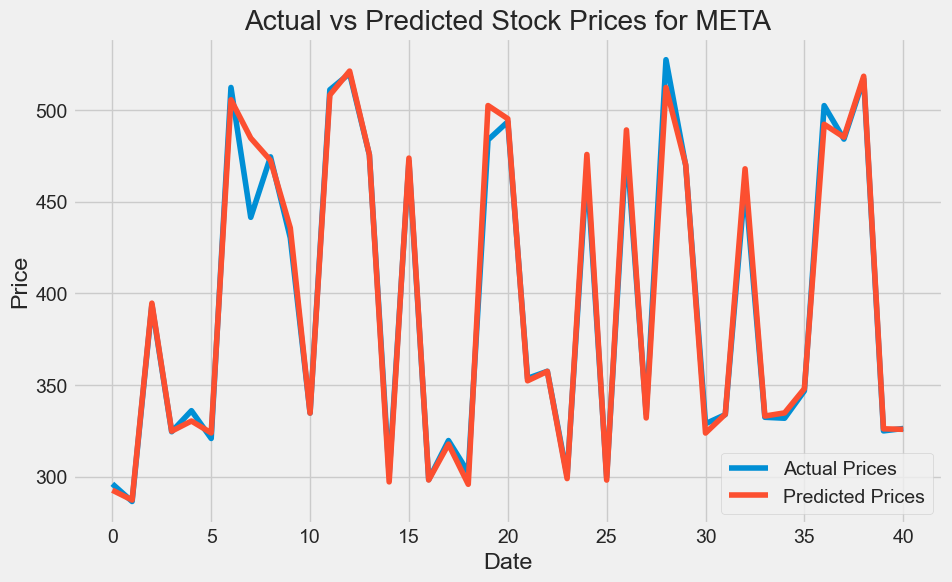

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


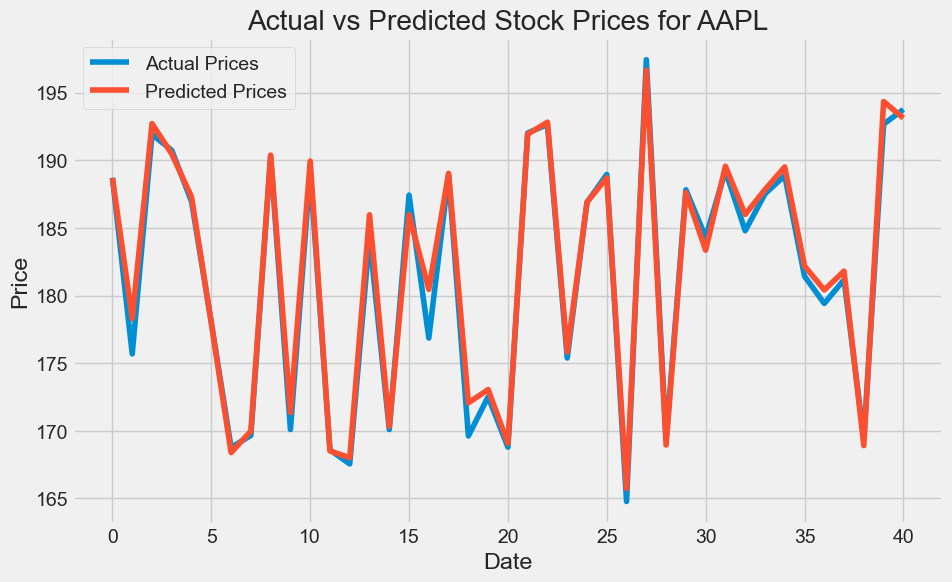

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


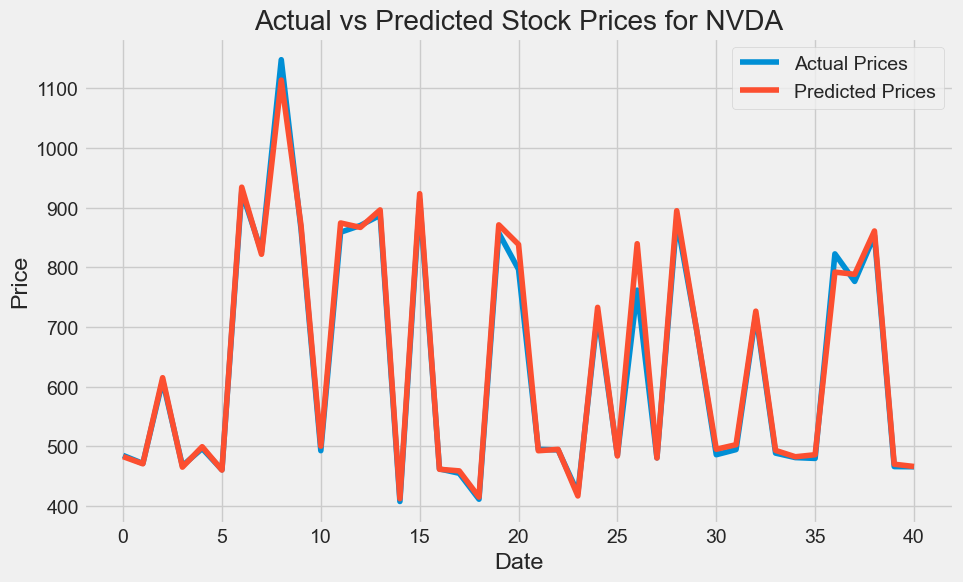

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


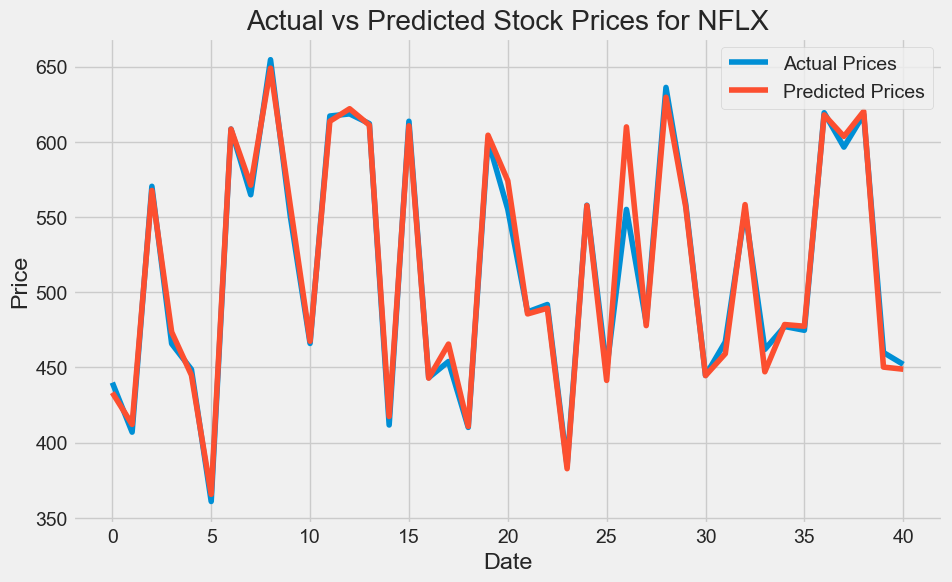

META:
Mean Squared Error: 73.0949546393748
Mean Absolute Error: 4.409037919228732

AAPL:
Mean Squared Error: 1.0968229504555969
Mean Absolute Error: 0.7266481957246425

NVDA:
Mean Squared Error: 283.5288200224573
Mean Absolute Error: 9.342451907546923

NFLX:
Mean Squared Error: 108.91117071554243
Mean Absolute Error: 5.752782404856094



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Custom function to calculate On-Balance Volume (OBV)
def calculate_obv(data):
    obv = (np.sign(data['Adj Close'].diff()) * data['Volume']).fillna(0).cumsum()
    return obv

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    stock['OBV'] = calculate_obv(stock)
    
    # Adding Bollinger Bands
    stock['20_day_std'] = stock['Adj Close'].rolling(window=20).std()
    stock['Upper_Band'] = stock['20_day_MA'] + (stock['20_day_std'] * 2)
    stock['Lower_Band'] = stock['20_day_MA'] - (stock['20_day_std'] * 2)
    
    # Lag features
    stock['Lag_1'] = stock['Adj Close'].shift(1)
    stock['Lag_2'] = stock['Adj Close'].shift(2)
    
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 
                'Upper_Band', 'Lower_Band', 'Lag_1', 'Lag_2', 'OBV']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

Processing META...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

META:
Mean Squared Error: 50.10997770371005
Mean Absolute Error: 4.8383891431117565

Processing AAPL...



[*********************100%%**********************]  1 of 1 completed

AAPL:
Mean Squared Error: 11.577017801823477
Mean Absolute Error: 2.5805706099611996

Processing NVDA...



[*********************100%%**********************]  1 of 1 completed

NVDA:
Mean Squared Error: 564.5729439168438
Mean Absolute Error: 15.44969500475366

Processing NFLX...


NFLX:
Mean Squared Error: 192.21671260802978
Mean Absolute Error: 9.294069488158089

The best model is for NFLX with MSE: 192.21671260802978


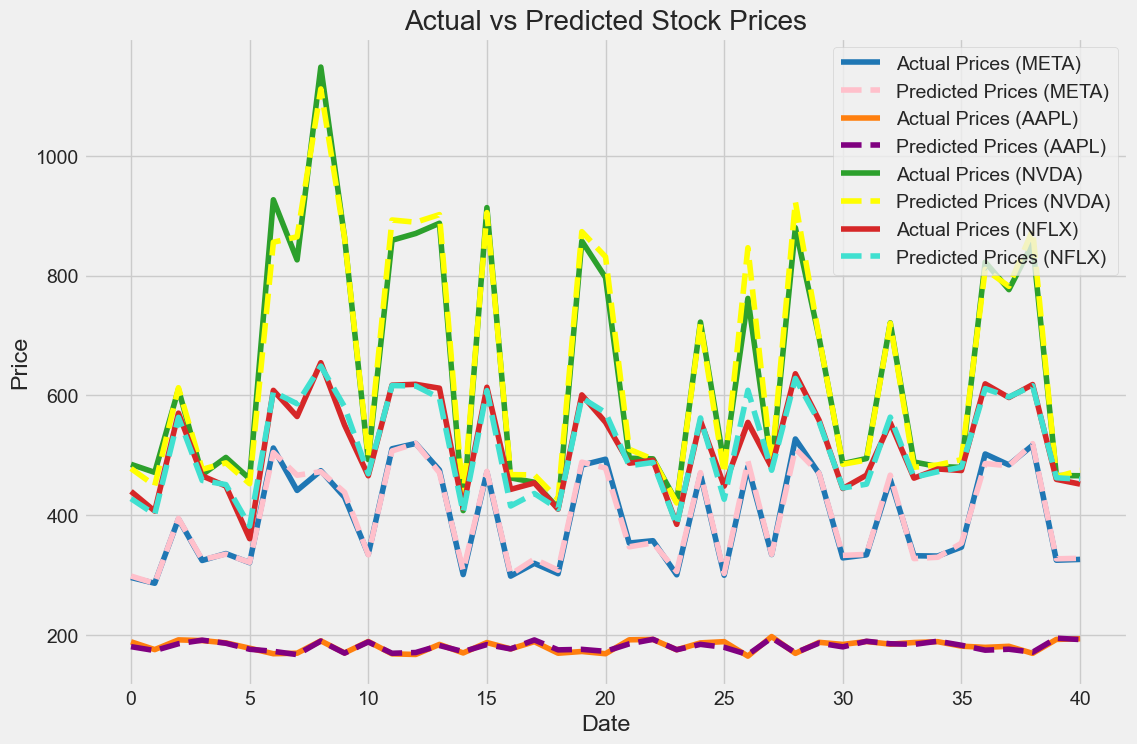

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Define the list of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Function to prepare data
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock.dropna(inplace=True)
    X = stock[['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return']]
    y = stock['Adj Close']
    return X, y

# Train and evaluate model for each stock
best_models = {}
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    X, y = prepare_data(ticker)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the model
    gbr = GradientBoostingRegressor()
    
    # Define the hyperparameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
    
    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    best_models[ticker] = best_model
    
    # Save the best model
    joblib.dump(best_model, f"{ticker}_model.pkl")
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{ticker}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print()

    # Store results
    results[ticker] = {"y_test": y_test, "y_pred": y_pred}

# Select the best model based on MSE
best_ticker, best_model = min(best_models.items(), key=lambda x: mean_squared_error(x[1].predict(X_test_scaled), y_test))

print(f"The best model is for {best_ticker} with MSE: {mean_squared_error(best_model.predict(X_test_scaled), y_test)}")

# Plot actual vs predicted for all stocks
plt.figure(figsize=(12, 8))
actual_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
predicted_colors = ['pink', 'purple', 'yellow', 'turquoise']
for i, (ticker, result) in enumerate(results.items()):
    actual_color = actual_colors[i] if i < len(actual_colors) else actual_colors[i % len(actual_colors)]  # Cycle through the color list
    predicted_color = predicted_colors[i] if i < len(predicted_colors) else predicted_colors[i % len(predicted_colors)]  # Cycle through the color list
    plt.plot(result['y_test'].values, label=f'Actual Prices ({ticker})', color=actual_color)
    plt.plot(result['y_pred'], label=f'Predicted Prices ({ticker})', linestyle='--', color=predicted_color)
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Processing META...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

META:
Mean Squared Error: 51.30994863739682
Mean Absolute Error: 4.902875894413062

Processing AAPL...



[*********************100%%**********************]  1 of 1 completed

AAPL:
Mean Squared Error: 11.240219697862923
Mean Absolute Error: 2.540512152296064

Processing NVDA...



[*********************100%%**********************]  1 of 1 completed

NVDA:
Mean Squared Error: 553.7729989083962
Mean Absolute Error: 15.081165559382002

Processing NFLX...


NFLX:
Mean Squared Error: 189.28283878548794
Mean Absolute Error: 9.226562897458365

The best model is for NFLX with MSE: 189.28283878548794


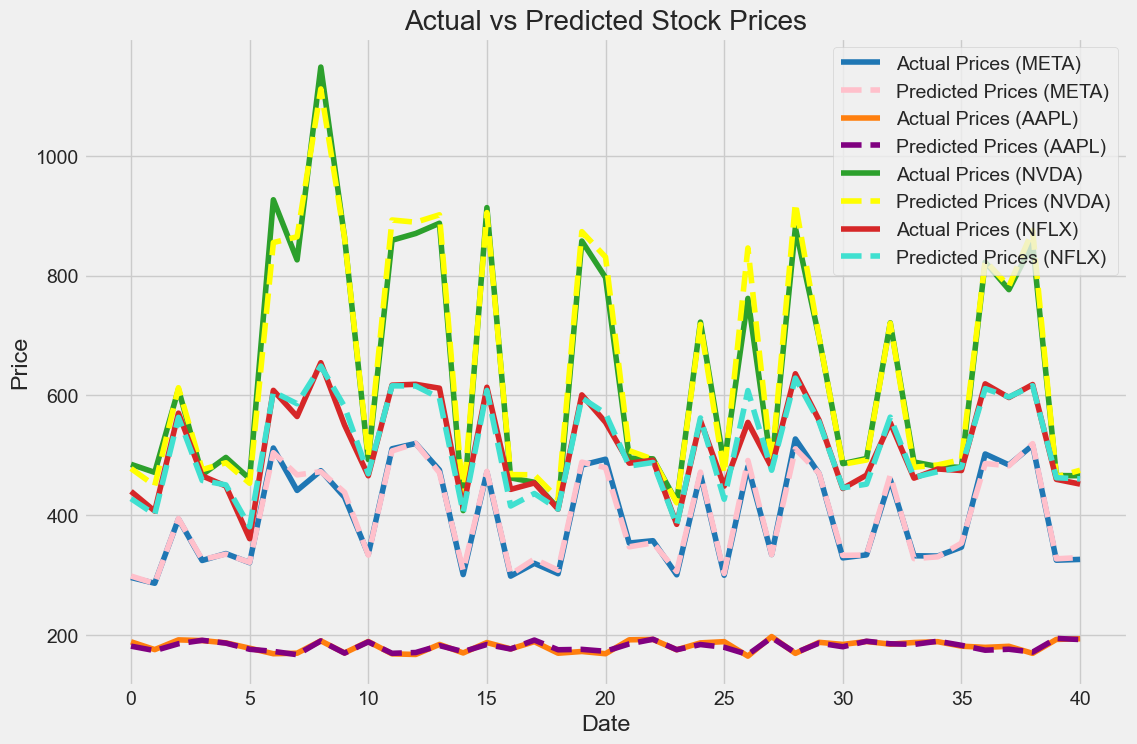

In [14]:
# Model Saving Script
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Define the list of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Function to prepare data
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock.dropna(inplace=True)
    X = stock[['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return']]
    y = stock['Adj Close']
    return X, y

# Train and evaluate model for each stock
best_models = {}
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    X, y = prepare_data(ticker)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the model
    gbr = GradientBoostingRegressor()
    
    # Define the hyperparameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
    
    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    best_models[ticker] = best_model
    
    # Save the best model
    joblib.dump(best_model, f"{ticker}_model.pkl")
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{ticker}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print()

    # Store results
    results[ticker] = {"y_test": y_test, "y_pred": y_pred}

# Select the best model based on MSE
best_ticker, best_model = min(best_models.items(), key=lambda x: mean_squared_error(x[1].predict(X_test_scaled), y_test))

print(f"The best model is for {best_ticker} with MSE: {mean_squared_error(best_model.predict(X_test_scaled), y_test)}")

# Plot actual vs predicted for all stocks
plt.figure(figsize=(12, 8))
actual_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
predicted_colors = ['pink', 'purple', 'yellow', 'turquoise']
for i, (ticker, result) in enumerate(results.items()):
    actual_color = actual_colors[i] if i < len(actual_colors) else actual_colors[i % len(actual_colors)]  # Cycle through the color list
    predicted_color = predicted_colors[i] if i < len(predicted_colors) else predicted_colors[i % len(predicted_colors)]  # Cycle through the color list
    plt.plot(result['y_test'].values, label=f'Actual Prices ({ticker})', color=actual_color)
    plt.plot(result['y_pred'], label=f'Predicted Prices ({ticker})', linestyle='--', color=predicted_color)
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()